In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier

text_clf = Pipeline([('vect', TfidfVectorizer()), 
                      ('clf', MultinomialNB()) ])

from sklearn.model_selection import train_test_split
#pip install gensim
import gensim 
from gensim.models import Word2Vec 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Loading the data extracted from scrapping
scrapped_data = pd.read_csv('C:/Users/300297872/Desktop/JaneApp/JObsalary/Project/webapp_SalaryPrediction/Final_Scrapped_Data.csv')

In [3]:
#view the data
scrapped_data.head()

,Unnamed: 0,Unnamed: 0.1,Job_Title,Company,Job_Location,Salaries,Job_Link,Job_Description
0,0,0,Senior Business Analyst and Account Manager,Orderbot Software Inc.,"Vancouver, BC",NaN,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,General descriptionCompany develops Order Mana...
1,1,1,Technical Business Analyst/Developer,RCN Call Center Services,"Montréal, QC","$60,000 - $80,000 a year",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Technical Business Analyst We are seeking an e...
2,2,2,Senior Business Analyst,Navirum,"Montréal, QC","$60,000 - $100,000 a year",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Navirum is hiring a Senior Business Analyst fo...
3,3,3,Business Analyst,Venor,"Charlottetown, PE",NaN,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"Our client, a Canadian-based IT company, has a..."
4,4,4,Business Systems Analyst,Merchant Processor Solutions,"Montréal, QC",NaN,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...,(Une version française suivra) About us: Merch...


In [4]:
#To find number of rows and columns in the dataset
scrapped_data.shape

(2765, 8)

In [5]:
#List of columns in the dataset
scrapped_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Job_Title', 'Company', 'Job_Location',
       'Salaries', 'Job_Link', 'Job_Description'],
      dtype='object')

In [6]:
#Choosing the required columns for the analysis
req_data = scrapped_data[['Job_Title','Salaries','Job_Description']]

In [7]:
#Dropping the null values
req_data = req_data.dropna()
req_data = req_data.reset_index(drop=True)

In [8]:
#Checking the datatypes of the required columns
req_data.dtypes

Job_Title          object
Salaries           object
Job_Description    object
dtype: object

In [9]:
#Replacing $ and , symbols with empty space from the Salaries 
req_data['Salaries'] = req_data['Salaries'].str.replace("$","")
req_data['Salaries'] = req_data['Salaries'].str.replace(",","")
req_data.head(10)

,Job_Title,Salaries,Job_Description
0,Technical Business Analyst/Developer,60000 - 80000 a year,Technical Business Analyst We are seeking an e...
1,Senior Business Analyst,60000 - 100000 a year,Navirum is hiring a Senior Business Analyst fo...
2,Dynamics 365 Business Analyst / Functional Con...,80000 a year,We're looking for great people so together we ...
3,JUNIOR BUSINESS ANALYST,1258 - 1584 a week,About the Cluster\n\nThe Labour and Transporta...
4,Business Analyst,39.50 an hour,"Evaluating business processes, anticipating re..."
5,Business Analyst,75000 - 80000 a year,Airfoam Industries Ltd is a market leader in t...
6,Data Visualization Business Analyst (Temporary...,39.67 an hour,Do you love using your data skills to find out...
7,Business Analyst,42 an hour,"TEI Inc. is looking for a full-time, permanent..."
8,Technical Business Analyst/Developer,60000 - 80000 a year,Technical Business Analyst We are seeking an e...
9,Senior Business Analyst,60000 - 100000 a year,Navirum is hiring a Senior Business Analyst fo...


In [10]:
#Finding the mean value of the salaries column and storing it in a new column
req_data['Mean_sal'] = pd.DataFrame(req_data['Salaries'].str.findall('(\d+)').values.tolist(),
                              index=req_data.index).astype(float).mean(1)

In [11]:
req_data.head(10)

,Job_Title,Salaries,Job_Description,Mean_sal
0,Technical Business Analyst/Developer,60000 - 80000 a year,Technical Business Analyst We are seeking an e...,70000.0
1,Senior Business Analyst,60000 - 100000 a year,Navirum is hiring a Senior Business Analyst fo...,80000.0
2,Dynamics 365 Business Analyst / Functional Con...,80000 a year,We're looking for great people so together we ...,80000.0
3,JUNIOR BUSINESS ANALYST,1258 - 1584 a week,About the Cluster\n\nThe Labour and Transporta...,1421.0
4,Business Analyst,39.50 an hour,"Evaluating business processes, anticipating re...",44.5
5,Business Analyst,75000 - 80000 a year,Airfoam Industries Ltd is a market leader in t...,77500.0
6,Data Visualization Business Analyst (Temporary...,39.67 an hour,Do you love using your data skills to find out...,53.0
7,Business Analyst,42 an hour,"TEI Inc. is looking for a full-time, permanent...",42.0
8,Technical Business Analyst/Developer,60000 - 80000 a year,Technical Business Analyst We are seeking an e...,70000.0
9,Senior Business Analyst,60000 - 100000 a year,Navirum is hiring a Senior Business Analyst fo...,80000.0


In [12]:
#Stroing hourly, weekly, monthly salary from salaries column in three different columns
hour_sal = req_data['Salaries'].str.contains('hour')
week_sal = req_data['Salaries'].str.contains('week')
month_sal = req_data['Salaries'].str.contains('month')

In [13]:
#Caculating the final salary based on hourly, weekly, monthly salaries
req_data['Final_Salary'] =np.select([hour_sal, week_sal,month_sal ], 
                          [req_data['Mean_sal'] * 1920,req_data['Mean_sal'] * 52,req_data['Mean_sal'] * 12], default=req_data['Mean_sal'])


In [14]:
#To view the data in final_salary column
req_data['Final_Salary']

0        70000.0
1        80000.0
2        80000.0
3        73892.0
4        85440.0
          ...   
1400    113000.0
1401     94000.0
1402     94000.0
1403     85000.0
1404     80000.0
Name: Final_Salary, Length: 1405, dtype: float64

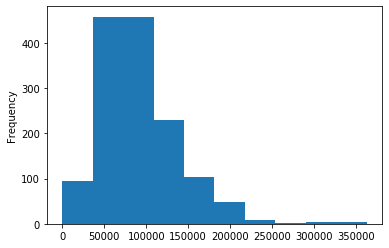

In [15]:
#Plot of histogram on finalsalary column
req_data['Final_Salary'].plot(kind='hist')

In [16]:
#Create Bins
BINS = [0,50000,70000,90000,120000,150000,400000]

# 0 - below 50k
# 1 - 50k - 70k
# 2 - 70k - 90k
# 3 - 90k - 120k
# 4 - 120k - 150k
# 5 - 150k - 400k

In [17]:
#storing the bin values of final_Salary in salary_bins column
req_data['Salary_BINS']= pd.cut(x=req_data['Final_Salary'], bins=BINS, labels=False)

In [18]:
#Exporting the data after creating bins 
req_data.to_csv('Data_After_Binning.csv')

# Model Building

### TfidfVectorizer

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is most commonly used algorithm which transforms text to feature vectors that can be used as input to estimator.

In [19]:
# choosing features and target
X = req_data['Job_Description']
Y = req_data['Salary_BINS']

In [20]:
#split the dataset into 70% training set and 30% test set
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


In [41]:
X_train

810     Duties and Responsibilities include the follow...
772     We are looking for a Sales and Marketing Coord...
427     HPC / Computational Data Scientist with Cleara...
931     Title: IT Business Analyst\rLocation: Alhambra...
236     Job Summary\nDefine, develop and lead a data s...
                              ...                        
1095    Behavior Interventions is a rapidly expanding ...
1130    We are looking for a talented and versatile So...
1294    We are looking for a talented Social media/Mar...
860     Hi,\rI am ARON from VedaInfo Inc., is a highly...
1126    Warehouse Supervisor\rCapstone is a leading No...
Name: Job_Description, Length: 983, dtype: object

In [42]:
Y_train

810     1
772     5
427     5
931     3
236     3
       ..
1095    1
1130    0
1294    0
860     1
1126    0
Name: Salary_BINS, Length: 983, dtype: int64

In [43]:
X_test

1074    Software Developer _ÑÐ ELK/Python\rLocation: P...
494     Job Description\rResponsibilities for IT Busin...
649     Entry Level Business Analyst\rResponsibilities...
654     Who are you? You_Ñére ready to join an organiz...
953     A rewarding opportunity has now become availab...
                              ...                        
287     Job DescriptionThe Data & Reporting Analyst is...
1354    The Director of Marketing is responsible for c...
1167    Interview Query is a rapidly growing data scie...
294     Title: Data Entry Operator - London\nDepartmen...
818     Common Capital\rCredit Analyst and Data Coordi...
Name: Job_Description, Length: 422, dtype: object

In [44]:
Y_test

1074    3
494     1
649     1
654     0
953     4
       ..
287     0
1354    4
1167    0
294     2
818     1
Name: Salary_BINS, Length: 422, dtype: int64

In [21]:
# train the model
text_clf.fit(X_train, Y_train)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [22]:
# Predict the train cases
predicted_train = text_clf.predict(X_train)

In [45]:
# Train Accuracy
print("Accuracy for train using TFID",accuracy_score(predicted_train,Y_train))

Accuracy for train using TFID 0.6561546286876907


In [24]:
# Predict the test cases
predicted_test = text_clf.predict(X_test)

In [46]:
# Test Accuracy
print("Accuracy for test using TFID",accuracy_score(predicted_test,Y_test))

Accuracy for test using TFID 0.44549763033175355


### TfidfVectorizer with classification

In [26]:
#split the dataset
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
   
#tfidverctorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

#Prediction and accuracy calculation using PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,Y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_pred,Y_test)
print("PAC",f'Accuracy: {round(score*100,2)}%')

#Prediction and accuracy calculation using Randomforest
rfc=RandomForestClassifier(n_estimators=5000, criterion='entropy', verbose=True, n_jobs=3)
rfc.fit(tfidf_train,Y_train)
y_pred=rfc.predict(tfidf_test)
score=accuracy_score(y_pred,Y_test)
print("RANDOM-FOREST",f'Accuracy: {round(score*100,2)}%')

#Prediction and accuracy calculation using XGBClassifier
xgb= XGBClassifier(random_state=42)
xgb.fit(tfidf_train, Y_train)
y_pred = xgb.predict(tfidf_test)
print("XGB-Classifier",accuracy_score(Y_test, y_pred))

# we can set the evaluation test and look at the validation results of all the gradient boosting
eval_set=[(tfidf_test, Y_test)]
xgb.fit(tfidf_train, Y_train, eval_set=eval_set, eval_metric='merror',verbose=True)
y_pred = xgb.predict(tfidf_test)
print("Gradient Boosting",accuracy_score(Y_test, y_pred))


PAC Accuracy: 61.37%


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    4.3s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    7.0s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:   10.9s
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:   15.5s
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:   20.8s
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:   26.9s
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:   34.2s
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed:   42.8s
[Parallel(n_jobs=3)]: Done 5000 out of 5000 | elapsed:   42.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 444

RANDOM-FOREST Accuracy: 64.69%
XGB-Classifier 0.6137440758293838
[0]	validation_0-merror:0.51896
[1]	validation_0-merror:0.49289
[2]	validation_0-merror:0.42654
[3]	validation_0-merror:0.42654
[4]	validation_0-merror:0.42654
[5]	validation_0-merror:0.42654
[6]	validation_0-merror:0.41706
[7]	validation_0-merror:0.41469
[8]	validation_0-merror:0.40521
[9]	validation_0-merror:0.39337
[10]	validation_0-merror:0.39099
[11]	validation_0-merror:0.38863
[12]	validation_0-merror:0.38863
[13]	validation_0-merror:0.38626
[14]	validation_0-merror:0.38863
[15]	validation_0-merror:0.39337
[16]	validation_0-merror:0.39099
[17]	validation_0-merror:0.39810
[18]	validation_0-merror:0.39099
[19]	validation_0-merror:0.40284
[20]	validation_0-merror:0.39099
[21]	validation_0-merror:0.39337
[22]	validation_0-merror:0.37678
[23]	validation_0-merror:0.37678
[24]	validation_0-merror:0.37915
[25]	validation_0-merror:0.38152
[26]	validation_0-merror:0.37678
[27]	validation_0-merror:0.38863
[28]	validation_0-mer

### Word2vec with classification

Word2vec is a two-layer neural net that processes text by vectorizing words. Its input is a text corpus and its output is a set of vectors that represent words in that corpus. It turns text into a numerical form that deep neural networks can understand.

The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. Word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words which can be fed into a deep-learning net or simply queried to detect relationships between words.

In [27]:
#split the dataset into 70% training set and 30% test set
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# Creating CBOW model 
model3 = Word2Vec(X, min_count = 4, size = 64, window = 5, workers=4) 

#Get the word vector for a given word
model3.wv.most_similar('x')

#creating dictionary to use in the pipeline 
w2v = dict(zip(model3.wv.index2word, model3.wv.vectors))

#Averaging word vectors for all words in the text
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(word2vec.values())

    def fit(self, x, y):
        return self

    def transform(self, x):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in x
        ])

In [49]:
#Names of the various classification approaches for easy presentation of the results
names = ["Logististic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",          
         "Decision Tree", "Naive Bayes","Random Forest","Bagging","AdaBoost","XGBClassifier"]

scores = [] 

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),   
    DecisionTreeClassifier(max_depth=5),    
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, criterion='entropy', verbose=True, n_jobs=3),
    BaggingClassifier(),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
            n_estimators=100, algorithm="SAMME.R", learning_rate=1,
            random_state=42),
    XGBClassifier(learning_rate=0.1)]

print("Model score using Word2Vec and different Classifiers:")

#Calculating accuracy using different classifiers
for classifier in classifiers:
    rf = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),('Classifier', classifier)])
    rf.fit(X_train, Y_train)
    print(classifier)
    scores.append(rf.score(X_test, Y_test))
    print("model score: %.3f" % rf.score(X_test, Y_test))
    print("\n -----------------------------------------------------------------------------------")
    

Model score using Word2Vec and different Classifiers:


C:\Users\300297872\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.313

 -----------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.372

 -----------------------------------------------------------------------------------
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model score: 0.201

 -

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=None, verbose=True,
                       warm_start=False)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


model score: 0.536

 -----------------------------------------------------------------------------------
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
model score: 0.533

 -----------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                      

Based on the above results random forest classifier using TFIDVectorizer has highest accuracy, so we are using Random forest classifier for prediction analysis.

### Confusion Matrix using Random forest Classifier with TFIDF vectorizer

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    6.6s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:   10.0s
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:   14.5s
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:   20.6s
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:   27.0s
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:   34.5s
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed:   43.3s
[Parallel(n_jobs=3)]: Done 5000 out of 5000 | elapsed:   43.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 444

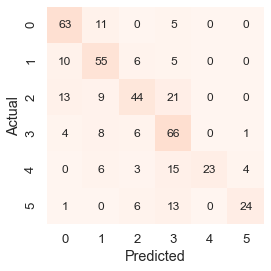

In [29]:
rfc=RandomForestClassifier(n_estimators=5000, criterion='entropy', verbose=True, n_jobs=3)
rfc.fit(tfidf_train,Y_train)
y_pred=rfc.predict(tfidf_test)

data = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size




### Classification Report

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        79
           1       0.62      0.72      0.67        76
           2       0.68      0.51      0.58        87
           3       0.53      0.78      0.63        85
           4       1.00      0.45      0.62        51
           5       0.83      0.55      0.66        44

    accuracy                           0.65       422
   macro avg       0.72      0.63      0.65       422
weighted avg       0.69      0.65      0.65       422



### Predicting salary based on the input

In [36]:
#creating a new datafram with data from linkedIn
df_new= pd.DataFrame({"Job_Description":["College / University Degree or equivalent in work experience CBAP or PBA certifications considered an asset 7 years’ experience as a Business Analyst 5 years’ insurance experience with exposure to underwriting processes Commercial insurance experience preferred Consulting background considered a strong asset Ability to clearly articulate complex business scenarios Experience in quality tools and continuous improvement methodologies Exposure to change management techniques Knowledge of industry standard  lifecycles and methods i.e. PMLC, SDLC / Waterfall, Hybrid, Agile Expert knowledge of Visio, Microsoft Word, PowerPoint, Excel and Access Excellent communication skills Excellent problem solving and analytical abilities",
                                        " 3+ years of relevant experience in data analytics A degree in science, engineering, business or other quantitative discipline • Financial services experience especially related to digital marketing analytics • Strong critical thinking and problem-solving skills including the ability to leverage data to formulate solutions that address complex business problems • Experience with digital marketing platforms and tools including Google Marketing Platform (DoubleClick), Facebook, AdWords, Google Analytics, and Adobe Analytics • Experience in data manipulation (e.g. SQL) and visualization (e.g. Tableau, DOMO, Google Studio) • A broad understanding of digital marketing data, analytical tools and methods and knowledge of where analytics may add value to marketing and/or business• Previous experience with supporting data staging • A passion for analytics, high comfort level and interest in interpreting data and results; ability to tell stories with data and facts • Strong interpersonal skills with experience in driving productive collaboration with internal clients and cross-functional team members • An overall dedication to producing high quality work and desire to continuously learn, develop and do better"]})

In [40]:
df_new

,Job_Description
0,College / University Degree or equivalent in w...
1,3+ years of relevant experience in data analy...


In [38]:
#Using TFID and Random Forest for predicing the salary
tfidf = tfidf_vectorizer
final_features = tfidf.transform(df_new["Job_Description"])
prediction = rfc.predict(final_features)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed:    4.4s
[Parallel(n_jobs=3)]: Done 5000 out of 5000 | elapsed:    4.4s finished


In [39]:
#Results
print(prediction)

[3 3]
